In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import RepetitionCode, ThresholdLAB

In [2]:
rep = RepetitionCode(
    distance = 5,
    depolarize1_rate = 0.05,
    depolarize2_rate = 0.05
)

rep.build_memory_circuit(number_of_rounds=2)
rep.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.05)-@-DEPOLARIZE2(0.05)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.05)-------------------------------------------------------------------------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.05)---------M:rec[8]--DETECTOR:D8=rec[8]*rec[9]*rec[4]----OBSERVABLE_INCLUDE:L0*=rec[8]-
                         | |                                                                                                                                                                                                                              | |
q1: -R-DEPOLARIZE1(0.05)-|-|-----------------@-DEPOLARIZE2(0.05)-----------------------------------------@-DEPOLARIZE2(0.05)------------------------------------------------------------------------------------------------------------------------------|-|-----------------@-DEPOLARIZE2(0.05)-----------------------------------------@-DEPOLARIZE2(0.05)-----------------------------------------------------------------------------------------DEPOLARIZE1(0.05)---------M:rec[9]--DETECTOR:D9=rec[9]*rec[10]*rec[5]---------------------------------
                         | |                 | |                                                         | |                                                                                                                                              | |                 | |                                                         | |
q2: -R-DEPOLARIZE1(0.05)-|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)---------------------|-|-----------------@-DEPOLARIZE2(0.05)----------------------------------------------------------------------------------------------------------|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)---------------------|-|-----------------@-DEPOLARIZE2(0.05)---------------------------------------------------------------------DEPOLARIZE1(0.05)---------M:rec[10]-DETECTOR:D10=rec[10]*rec[11]*rec[6]-------------------------------
                         | |                 | |                 | |                                     | |                 | |                                                                                                                          | |                 | |                 | |                                     | |                 | |
q3: -R-DEPOLARIZE1(0.05)-|-|-----------------|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)-|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)--------------------------------------------------------------------------------------|-|-----------------|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)-|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)-------------------------------------------------DEPOLARIZE1(0.05)---------M:rec[11]-DETECTOR:D11=rec[11]*rec[12]*rec[7]-------------------------------
                         | |                 | |                 | |                 | |                 | |                 | |                 | |                                                                                                      | |                 | |                 | |                 | |                 | |                 | |                 | |
q4: -R-DEPOLARIZE1(0.05)-|-|-----------------|-|-----------------|-|-----------------|-|-----------------|-|-----------------|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)------------------------------------------------------------------|-|-----------------|-|-----------------|-|-----------------|-|-----------------|-|-----------------|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)-----------------------------DEPOLARIZE1(0.05)---------M:rec[12]-----------------------------------------------

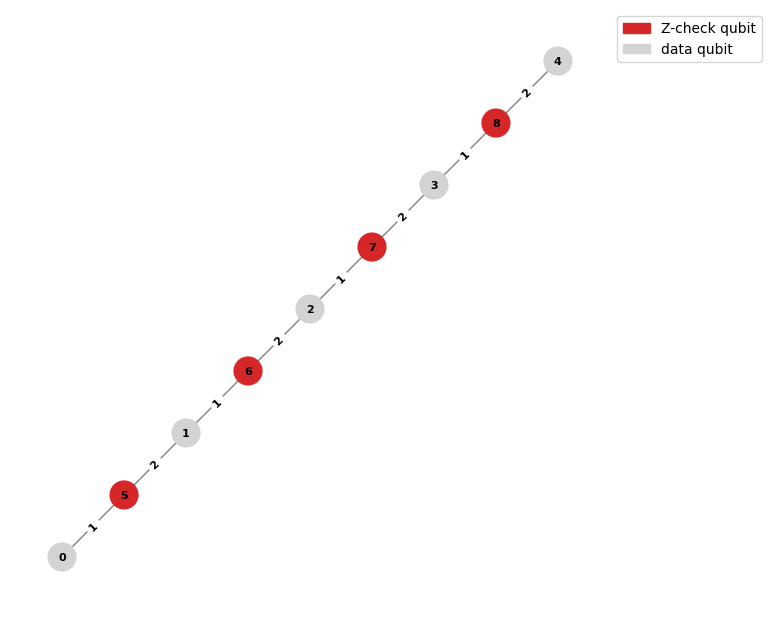

In [3]:
rep.draw_graph()

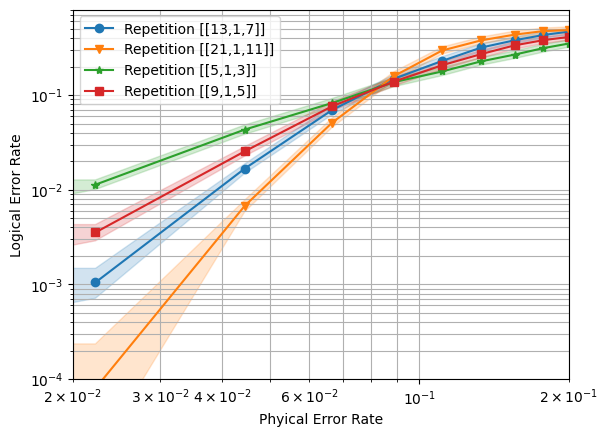

In [4]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = RepetitionCode,
    error_rates = np.linspace(0, 0.2, 10),
    decoder='pymatching'
    
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000
)

th.plot_stats(
    x_min = 2e-2, 
    x_max = 2e-1,
    y_min = 1e-4, 
    y_max = 8e-1
)